<a href="https://colab.research.google.com/github/nvp951753/Doan-Le-Nhat-Nam-19146360/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data: https://drive.google.com/file/d/11E899zTauy3tzFX7EWvHvfYwUBXRo-f4/view?usp=sharing

In [1]:
!unzip /content/drive/MyDrive/dataset/face.zip

Archive:  /content/drive/MyDrive/dataset/face.zip
   creating: dttrain/
  inflating: dttrain/00.jpg          
  inflating: dttrain/01.jpg          
  inflating: dttrain/010.jpg         
  inflating: dttrain/011.jpg         
  inflating: dttrain/012.jpg         
  inflating: dttrain/013.jpg         
  inflating: dttrain/014.jpg         
  inflating: dttrain/015.jpg         
  inflating: dttrain/016.jpg         
  inflating: dttrain/017.jpg         
  inflating: dttrain/018.jpg         
  inflating: dttrain/019.jpg         
  inflating: dttrain/02.jpg          
  inflating: dttrain/03.jpg          
  inflating: dttrain/04.jpg          
  inflating: dttrain/05.jpg          
  inflating: dttrain/06.jpg          
  inflating: dttrain/07.jpg          
  inflating: dttrain/08.jpg          
  inflating: dttrain/09.jpg          
  inflating: dttrain/10.jpg          
  inflating: dttrain/108.jpg         
  inflating: dttrain/109.jpg         
  inflating: dttrain/11.jpg          
  inflating: dtt

In [2]:
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.utils as u

In [ ]:
type(filenames[0])

str

In [4]:
def make_square(img):
    '''
    Reshapes the non-square image by pasting
    it to the centre of a black canvas of size
    n*n where n is the biggest dimension of
    the non-square image. 
    '''
    #Getting the bigger side of the image
    s = max(img.shape[0:2])

    #Creating a dark square with NUMPY  
    f = np.zeros((s,s,3),np.uint8)

    #Getting the centering position
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

    #Pasting the 'image' in a centering position
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    f = cv2.resize(f, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    return f
filenames = [img for img in glob.glob("dttrain/*.jpg")]
x_train = []
y_train = []
for img in filenames:
  n = cv2.imread(img)
  n=make_square(n)
  a=img.split('/',1)
  a=a[1]
  ten = int(a[0])
  x_train.append(n)
  y_train.append(ten)

x_train= np.array(x_train).astype('float32')
x_train/=255
y_train=to_categorical(y_train)
y_train= np.array(y_train).astype('float32')


In [ ]:
x_train[0].shape

(100, 100, 3)

In [22]:
model = Sequential()
model.add(Conv2D(150,(3,3),activation ='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(300,(3,3),activation ='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()
opt = Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=1,verbose=1,validation_split=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 150, 150, 150)     4200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 150)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 300)       405300    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 300)      0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 410700)            0         
                                                                 
 dense_14 (Dense)            (None, 256)              

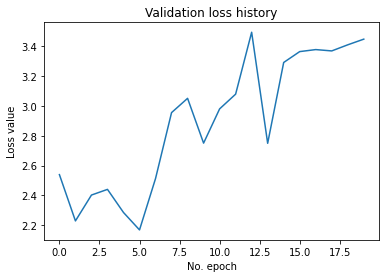

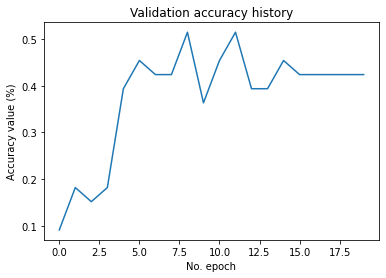

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

dự đoán là: sad


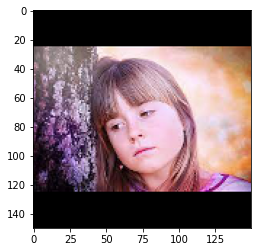

In [27]:
def make_square(img):
    '''
    Reshapes the non-square image by pasting
    it to the centre of a black canvas of size
    n*n where n is the biggest dimension of
    the non-square image. 
    '''
    #Getting the bigger side of the image
    s = max(img.shape[0:2])

    #Creating a dark square with NUMPY  
    f = np.zeros((s,s,3),np.uint8)

    #Getting the centering position
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

    #Pasting the 'image' in a centering position
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    f = cv2.resize(f, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    return f
thuvien = ['happy','sad','surprise','angry']
tenfile = '13.jpg'
pre = u.load_img(tenfile)


pre= np.array(pre)
pre = make_square(pre)

show=pre
pre= np.array(pre).astype('float32')
pre/=255
pre = pre.reshape(-1,150,150,3)
er=np.argmax(model.predict(pre))
print('dự đoán là: ' + thuvien[er])
plt.imshow(show,cmap=plt.get_cmap('gray'))
plt.show()